In [1]:
# Array and data functions
from glob import glob
from tqdm import tqdm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from MEDUSSA.transform import ConfIntSampler

In [2]:
joint_df = pd.read_csv('https://github.com/OReyesMatte/MEDUSSA/raw/refs/heads/main/Figures/FigureS6/joint_days_df.csv')

strains = ['WH320','1060','7A242','QMB1551','DSM319','7A1']

megaterium_dfs = []

for strain in strains:
    subdf = joint_df[joint_df['Strain']==strain]
    c1,c2 = subdf.groupby(['Day']).size().reset_index(name='counts')['counts']
    
    if c1 > c2:
        ddf = subdf[subdf['Day'] == 'Day1']
        megaterium_dfs.append(ddf)
    else:
        ddf = subdf[subdf['Day'] == 'Day2']
        megaterium_dfs.append(ddf)

In [3]:
megaterium= pd.concat(megaterium_dfs)

megaterium['SV'] = megaterium['SurfaceArea_mu']/megaterium['Volume_mu']

L = ConfIntSampler(megaterium,columns=['Strain','Stage'],metric='Length_mu',interval=0.95)
w = ConfIntSampler(megaterium,columns=['Strain','Stage'],metric='Width_mu',interval=0.95)
 
V = ConfIntSampler(megaterium,columns=['Strain','Stage'],metric='Volume_mu',interval=0.95)
SV = ConfIntSampler(megaterium,columns=['Strain','Stage'],metric='SV',interval=0.95)

/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_57424/1355820115.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(empty_labels)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_57424/1355820115.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(empty_labels)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_57424/1355820115.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(xticks_w,fontsize=12.5)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_57424/1355820115.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(xticks_L

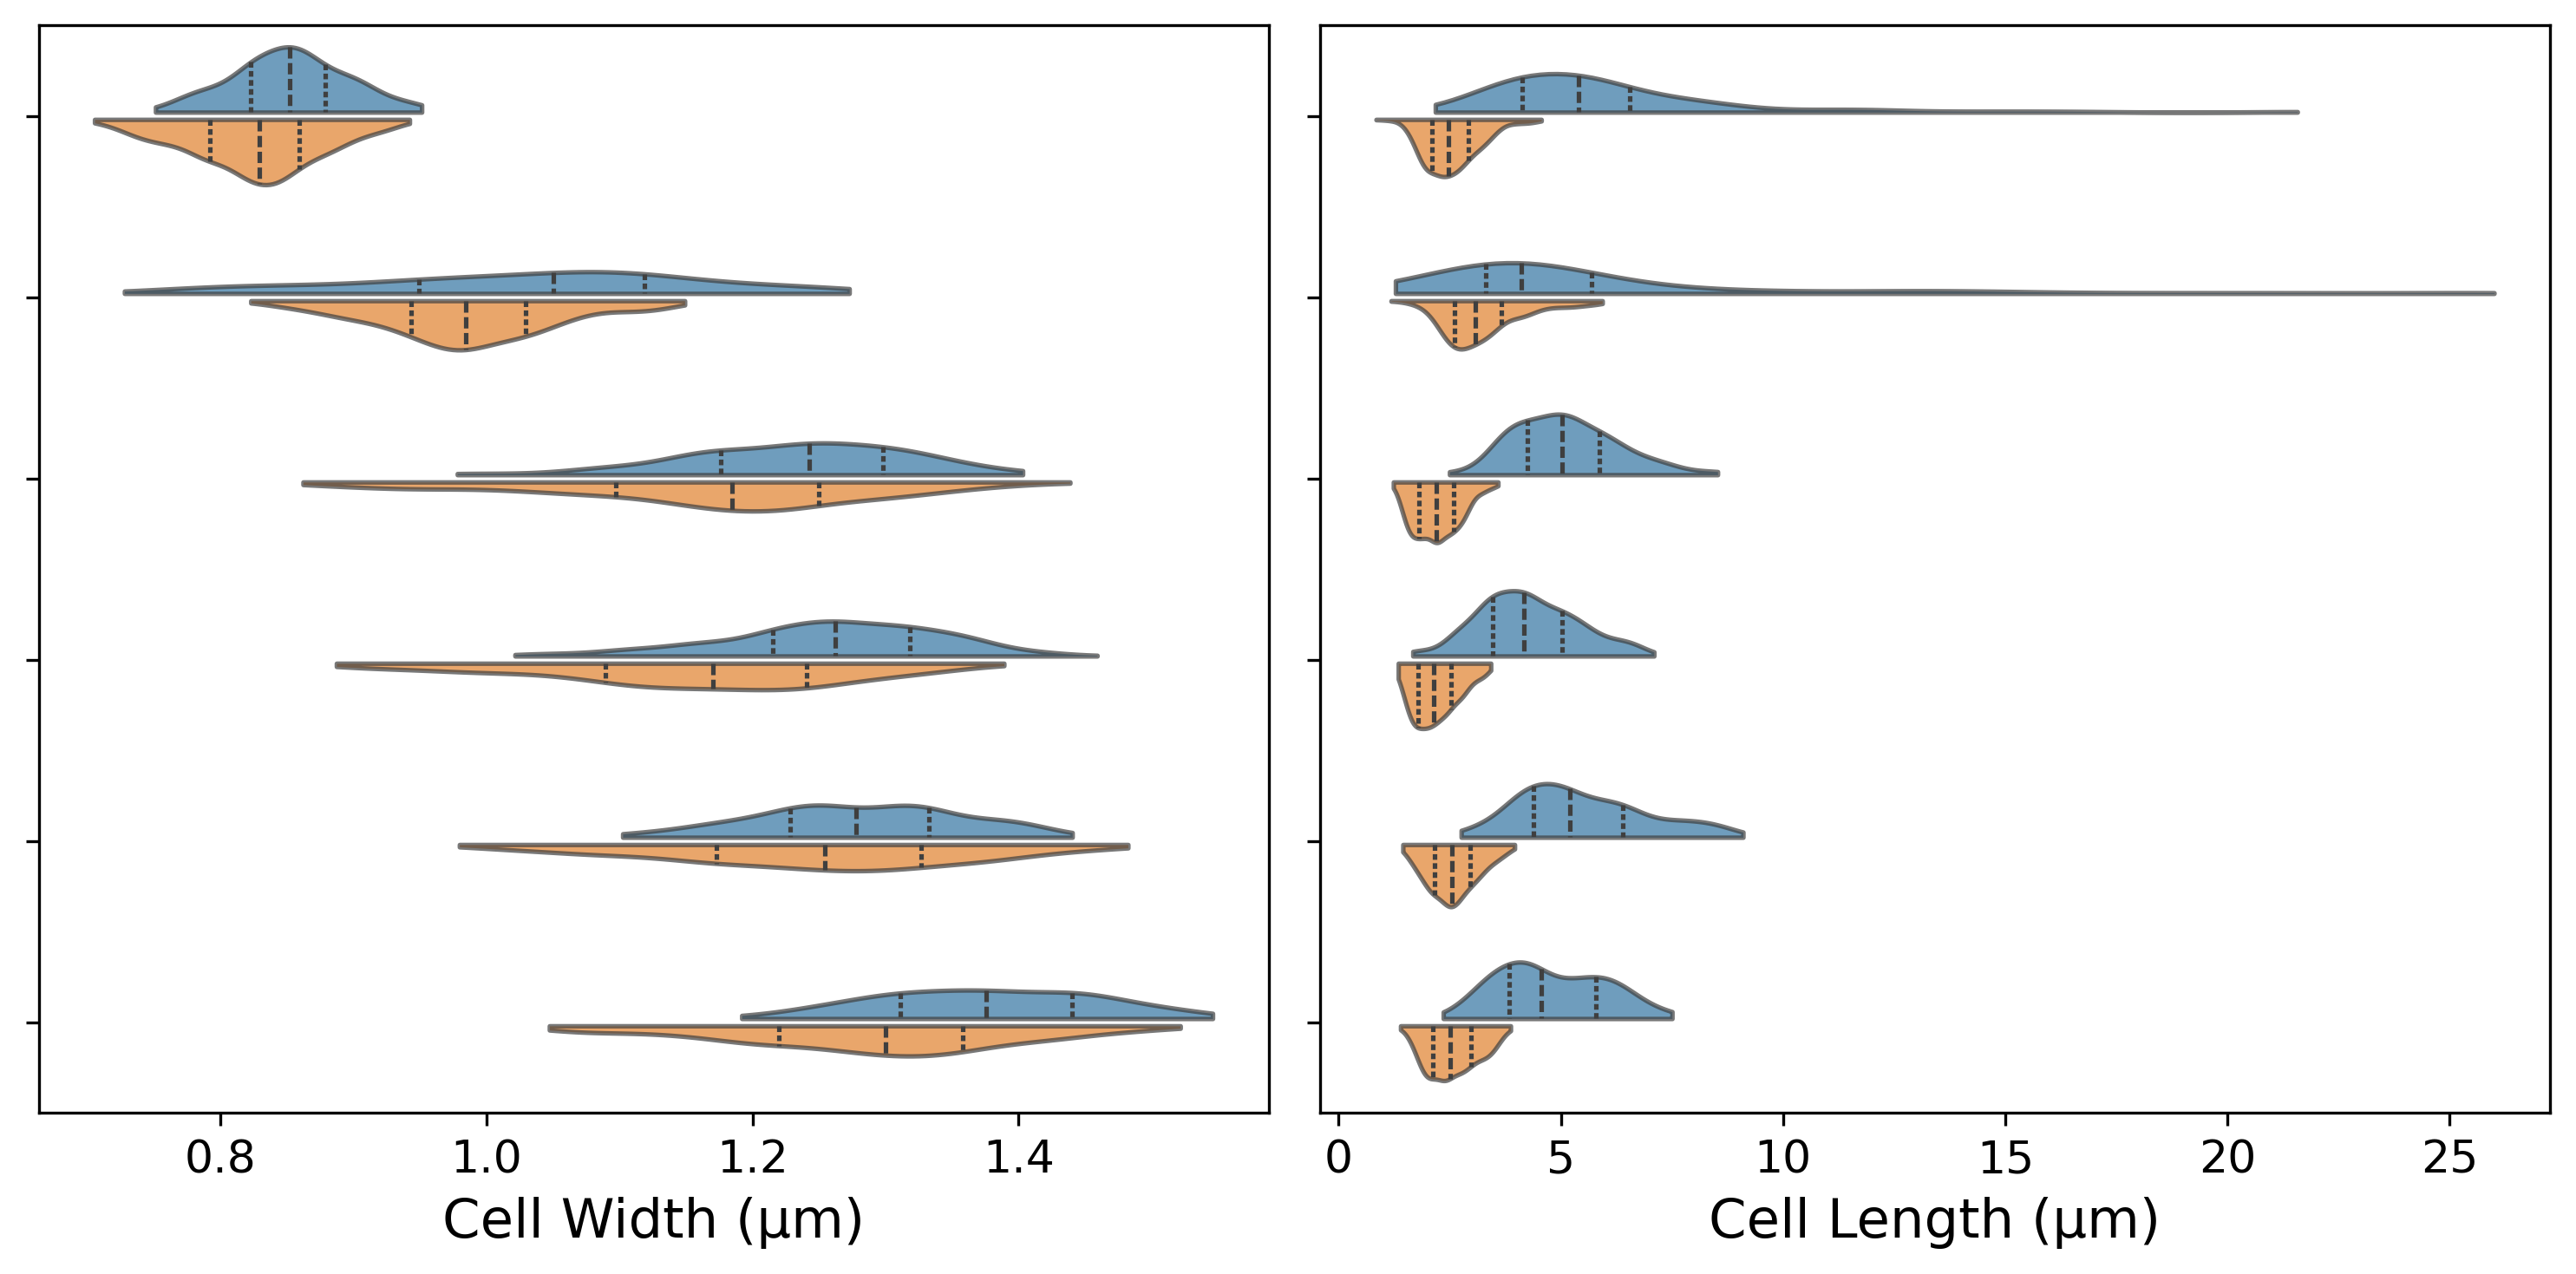

In [5]:
sorted_strains = np.array(w[w['Stage']=='Exponential'].groupby(by=['Strain'])[f'Width_mu'].median().sort_values().index)
xticks_L = [-5,0,5,10,15,20,25] 
xticks_w = [0.6,0.8,1.0,1.2,1.4,1.6] 

fig,ax = plt.subplots(dpi=300,figsize=(10,5),ncols=2)
sns.violinplot(data=w,y='Strain',x='Width_mu',inner='quart',hue='Stage',split=True,alpha=0.7,ax=ax[0],gap=0.1,order=sorted_strains,legend=False,cut=0)
sns.violinplot(data=L,y='Strain',x='Length_mu',inner='quart',hue='Stage',split=True,alpha=0.7,ax=ax[1],gap=0.1,order=sorted_strains,legend=False,cut=0)

empty_labels = ["" for l in sorted_strains]
    
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[0].set_yticklabels(empty_labels)
ax[1].set_yticklabels(empty_labels)
ax[0].set_xticklabels(xticks_w,fontsize=12.5)
ax[1].set_xticklabels(xticks_L,fontsize=12.5)
ax[0].set_xlabel("Cell Width (µm)",fontsize=15)
ax[1].set_xlabel("Cell Length (µm)",fontsize=15)


fig.tight_layout()

fig.savefig('/Users/reyesmatte/Desktop/Imaging_paper/Fig5/Dists_WL.png')

/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_57424/2471810199.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(empty_labels)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_57424/2471810199.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(empty_labels)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_57424/2471810199.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(xticks_V,fontsize=12.5)
/var/folders/q6/szs86xgn755_g81_n0cyblxc0000gp/T/ipykernel_57424/2471810199.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(xticks_S

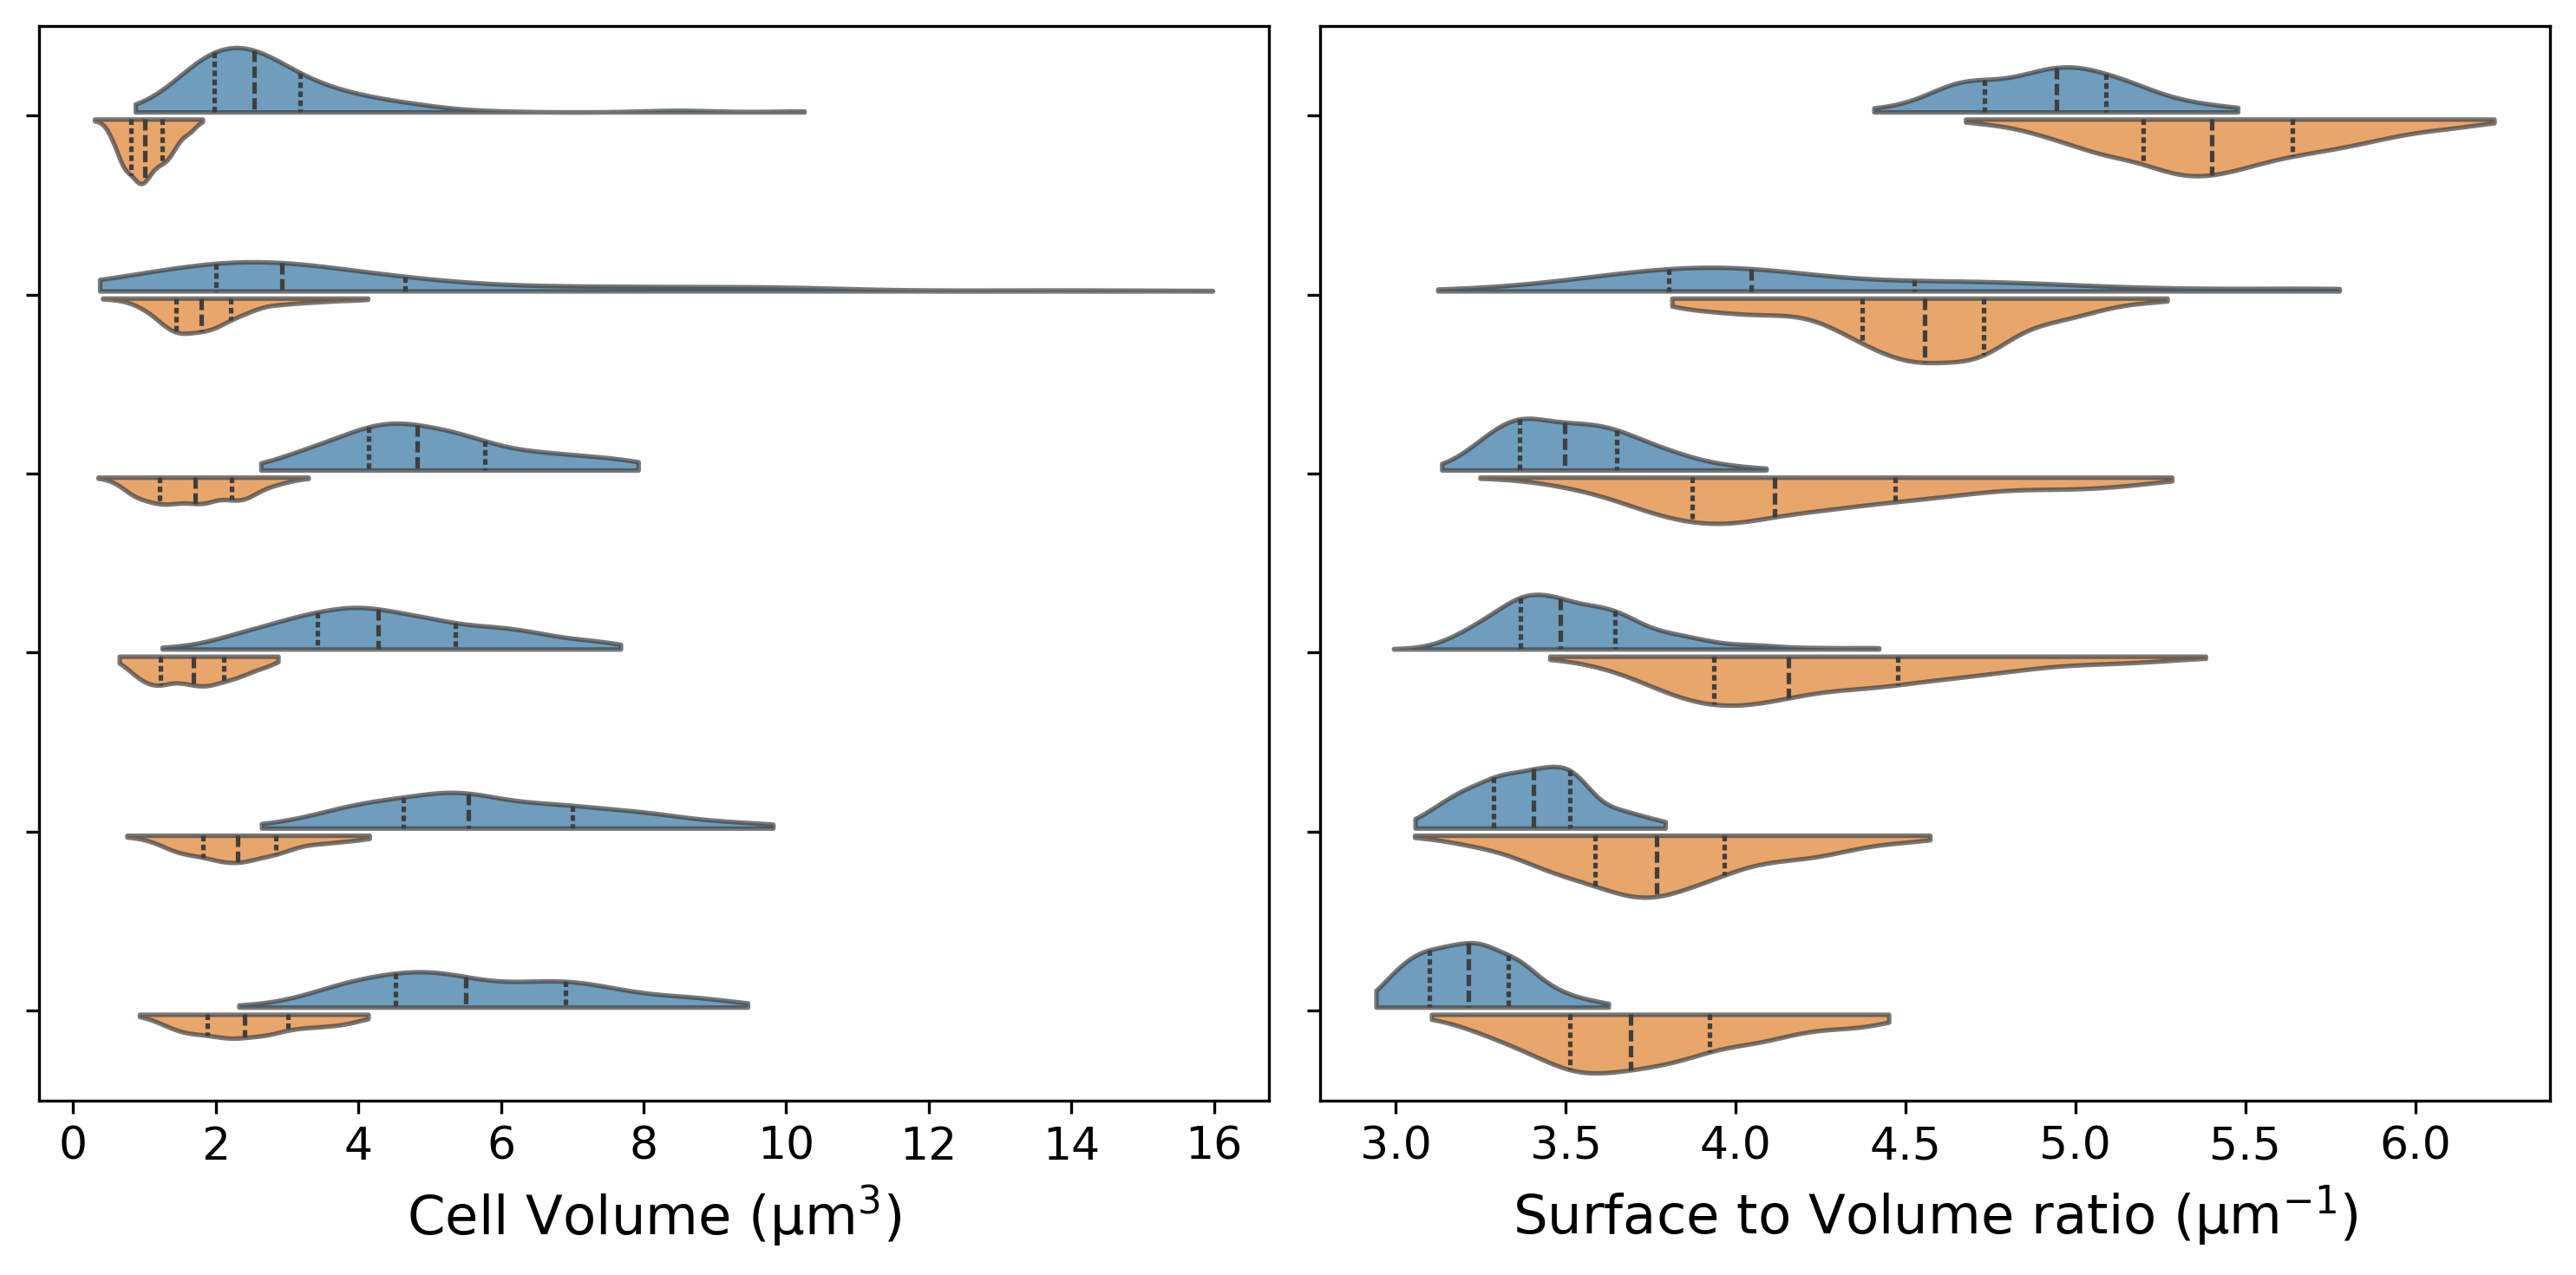

In [6]:
sorted_strains = np.array(w[w['Stage']=='Exponential'].groupby(by=['Strain'])[f'Width_mu'].median().sort_values().index)
xticks_V = [-2,0,2,4,6,8,10,12,14,16] 
xticks_SV = [2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0] 

fig,ax = plt.subplots(dpi=300,figsize=(10,5),ncols=2)
sns.violinplot(data=V,y='Strain',x='Volume_mu',inner='quart',hue='Stage',split=True,alpha=0.7,ax=ax[0],gap=0.1,order=sorted_strains,legend=False,cut=0)
sns.violinplot(data=SV,y='Strain',x='SV',inner='quart',hue='Stage',split=True,alpha=0.7,ax=ax[1],gap=0.1,order=sorted_strains,legend=False,cut=0)

empty_labels = ["" for l in sorted_strains]
    
ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[0].set_yticklabels(empty_labels)
ax[1].set_yticklabels(empty_labels)
ax[0].set_xticklabels(xticks_V,fontsize=12.5)
ax[1].set_xticklabels(xticks_SV,fontsize=12.5)
ax[0].set_xlabel("Cell Volume (µm$^3$)",fontsize=15)
ax[1].set_xlabel("Surface to Volume ratio (µm$^{-1}$)",fontsize=15)
fig.tight_layout()

fig.savefig('/Users/reyesmatte/Desktop/Imaging_paper/Fig5/Dists_VSV.png')